In [1]:
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

os.chdir("..")
os.chdir("..")
from driver_folder.time_driver import TimerError

In [2]:
T = TimerError()
T.start()
end_time = T.elapsed()
print(f"time taken:{end_time}")

time taken:2.5657998776296154e-05


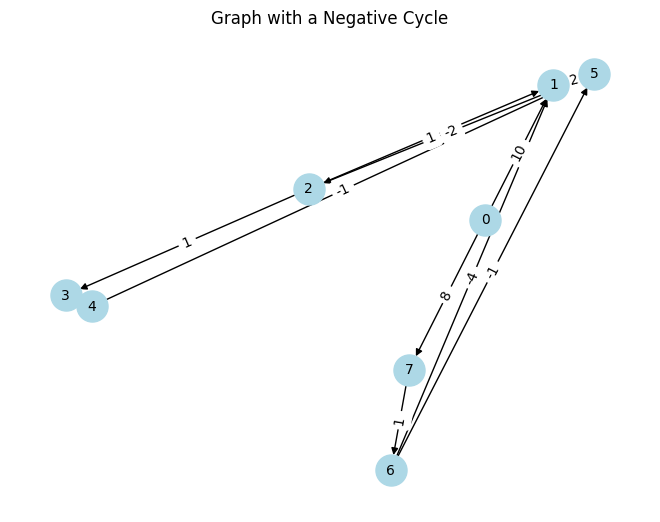

In [26]:
# Number of nodes
num_nodes = 8

# Initialize adjacency matrix with inf (representing no connection)
adj_matrix = np.zeros((num_nodes, num_nodes, 2))

# Define the edges and their weights
edges = [
    (0, 1, 10),
    (0, 7, 8),
    (1, 5, 2),
    (2, 1, 1),
    (2, 3, 1),
    (3, 4, 3),
    (4, 5, -1),
    (5, 2, -2),
    (6, 1, -4),
    (6, 5, -1),
    (7, 6, 1),
]

# Fill the adjacency matrix with the edge weights
for edge in edges:
    u, v, weight = edge
    adj_matrix[u, v] = [1, weight]

# Create a NetworkX graph
G = nx.DiGraph()

# Add edges with weights to the graph
for u, v, weight in edges:
    G.add_edge(u, v, weight=weight)

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=500,
    font_size=10,
    arrows=True,
)

# Draw edge labels
edge_labels = {(u, v): f'{d["weight"]:.0f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Graph with a Negative Cycle")
plt.show()

In [27]:
def bellmanford(Wmat, source):
    rows, cols, x = Wmat.shape
    connection = 0
    weights = 1
    infinity = np.max(Wmat) * rows + 1
    distance = {}

    for vertex in range(rows):
        distance[vertex] = infinity

    distance[source] = 0
    for _ in range(rows):
        for vertex in range(rows):
            for child in range(cols):
                if Wmat[vertex, child, connection] == 1:
                    distance[child] = min(
                        distance[child], distance[vertex] + Wmat[vertex, child, weight]
                    )
    return distance

In [30]:
distance = bellmanford(adj_matrix, source=0)

In [31]:
distance

{0: 0, 1: 5.0, 2: 5.0, 3: 6.0, 4: 9.0, 5: 7.0, 6: 9.0, 7: 8.0}

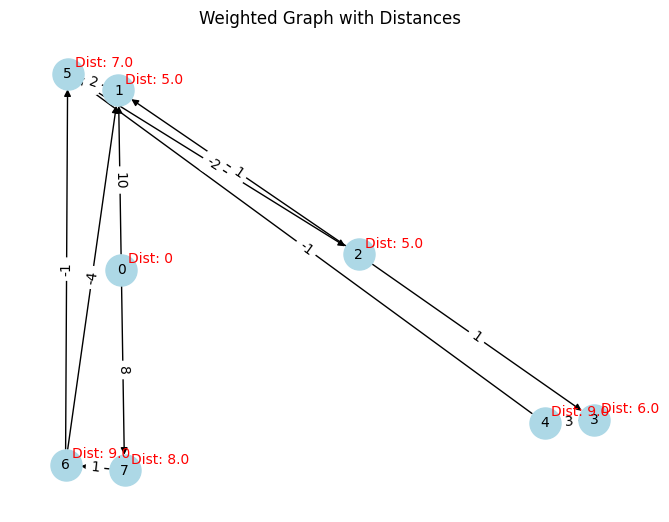

In [36]:
G = nx.DiGraph()

# Add edges with weights to the graph
for i in range(num_nodes):
    for j in range(num_nodes):
        if adj_matrix[i, j, 0] == 1:
            G.add_edge(i, j, weight=adj_matrix[i, j, 1])


# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)

# Draw edge labels
edge_labels = {(u, v): f'{d["weight"]:.0f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Add the distance information to the plot
for node, dist in distance.items():
    plt.annotate(
        f"Dist: {dist}",
        xy=pos[node],
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
        color="red",
    )

plt.title("Weighted Graph with Distances")
plt.show()

In [37]:
distance

{0: 0, 1: 5.0, 2: 5.0, 3: 6.0, 4: 9.0, 5: 7.0, 6: 9.0, 7: 8.0}